# Laboratorio 2

## Inteligencia de Negocios

## Integrantes:
    Juan Diego Cardona 201819447
    Nicolas Ortega 201814515
    Camila Teran 201822000

## Carga de librerías

In [110]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import hdbscan

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

## Carga de datos

In [112]:
# Se cargan los datos. 
datos=pd.read_csv('datos.csv', sep=';', encoding = 'utf-8')

## Perfilamiento y entendimiento de los datos 

In [113]:
datos.shape

(660, 11)

In [114]:
datos.head()

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073.0,20000.0,Female,2,Married,24.0,2.0,1,1.0,0
1,2,38414.0,120000.0,Female,2,Single,26.0,3.0,0,10.0,9
2,3,17341.0,90000.0,Female,2,Single,34.0,7.0,1,3.0,4
3,4,40496.0,50000.0,Female,2,Married,37.0,5.0,1,1.0,?
4,5,47437.0,50000.0,Male,2,Married,57.0,6.0,0,12.0,3


In [115]:
# Revisar las características de los datos: completitud y tipo de dato
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   660 non-null    int64  
 1   Customer             658 non-null    float64
 2   Limit_bal            659 non-null    float64
 3   Sex                  659 non-null    object 
 4   Education            659 non-null    object 
 5   Marriage             658 non-null    object 
 6   Age                  659 non-null    float64
 7   Total_Credit_Cards   658 non-null    float64
 8   Total_visits_bank    658 non-null    object 
 9   Total_visits_online  659 non-null    float64
 10  Total_calls_made     659 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 56.8+ KB


## Limpieza de Datos

In [116]:
datoslimpios = datos
datoslimpios

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073.0,20000.0,Female,2,Married,24.0,2.0,1,1.0,0
1,2,38414.0,120000.0,Female,2,Single,26.0,3.0,0,10.0,9
2,3,17341.0,90000.0,Female,2,Single,34.0,7.0,1,3.0,4
3,4,40496.0,50000.0,Female,2,Married,37.0,5.0,1,1.0,?
4,5,47437.0,50000.0,Male,2,Married,57.0,6.0,0,12.0,3
...,...,...,...,...,...,...,...,...,...,...,...
655,656,51108.0,280000.0,Male,2,Married,39.0,10.0,1,10.0,0
656,657,60732.0,290000.0,Female,3,Single,27.0,10.0,1,13.0,2
657,658,53834.0,190000.0,Female,1,Single,28.0,8.0,1,9.0,1
658,659,80655.0,80000.0,Female,1,Single,23.0,10.0,1,15.0,0


In [117]:
for x in datoslimpios.columns:
    datoslimpios.drop(datoslimpios.loc[datoslimpios[x]=='?'].index,inplace=True)

In [118]:
datoslimpios["Sex"]=datoslimpios.Sex.replace({'F':'Female','f':'Female','Femael':'Female','Fmale':'Female'})
datoslimpios["Sex"]=datoslimpios.Sex.replace({'M':'Male','Mael':'Male','M ':'Male'})
datoslimpios.drop(datoslimpios.loc[datoslimpios["Sex"]=='9'].index,inplace=True)

In [119]:
datoslimpios["Education"]=datoslimpios.Education.replace({'6':'5'})
datoslimpios.drop(datoslimpios.loc[datoslimpios["Education"]=='ABC'].index,inplace=True)

In [120]:
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='1'].index,inplace=True)
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='2'].index,inplace=True)
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='0'].index,inplace=True)

In [121]:
datoslimpios = datoslimpios.dropna()

In [122]:
#Restricciones

datoslimpios = datoslimpios.drop(['Id'], axis=1)
datoslimpios = datoslimpios.drop(['Customer'], axis=1)

datoslimpios = datoslimpios[datoslimpios.Age < 100]
datoslimpios = datoslimpios[datoslimpios.Age >= 21]

datoslimpios = datoslimpios[datoslimpios.Total_Credit_Cards <= 10]

In [123]:
datoslimpios['Total_visits_bank'] = datoslimpios.Total_visits_bank.astype(float)
datoslimpios['Total_calls_made'] = datoslimpios.Total_calls_made.astype(float)
datoslimpios['Education'] = datoslimpios.Education.astype(float)

In [124]:
datoslimpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 659
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Limit_bal            639 non-null    float64
 1   Sex                  639 non-null    object 
 2   Education            639 non-null    float64
 3   Marriage             639 non-null    object 
 4   Age                  639 non-null    float64
 5   Total_Credit_Cards   639 non-null    float64
 6   Total_visits_bank    639 non-null    float64
 7   Total_visits_online  639 non-null    float64
 8   Total_calls_made     639 non-null    float64
dtypes: float64(7), object(2)
memory usage: 49.9+ KB


In [125]:
# Explorar las variables que no son numéricas
name_cols_non_number = datoslimpios.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Sex', 'Marriage'], dtype='object')

In [126]:
#Revisar el contenido de las variables que no son numéricas
datoslimpios[name_cols_non_number].describe()

,Sex,Marriage
count,639,639
unique,2,3
top,Female,Single
freq,369,373


In [127]:
datoslimpios.reset_index(drop=True, inplace=True)
datoslimpios

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,20000.0,Female,2.0,Married,24.0,2.0,1.0,1.0,0.0
1,120000.0,Female,2.0,Single,26.0,3.0,0.0,10.0,9.0
2,90000.0,Female,2.0,Single,34.0,7.0,1.0,3.0,4.0
3,50000.0,Male,2.0,Married,57.0,6.0,0.0,12.0,3.0
4,50000.0,Male,1.0,Single,37.0,3.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...
634,280000.0,Male,2.0,Married,39.0,10.0,1.0,10.0,0.0
635,290000.0,Female,3.0,Single,27.0,10.0,1.0,13.0,2.0
636,190000.0,Female,1.0,Single,28.0,8.0,1.0,9.0,1.0
637,80000.0,Female,1.0,Single,23.0,10.0,1.0,15.0,0.0


## Codificación variables categóricas

Primero separamos los datos

In [128]:
df_numeric = datoslimpios[datoslimpios.select_dtypes(include = ['float']).columns]
df_categorical = datoslimpios[datoslimpios.select_dtypes(include = ['object']).columns]

In [129]:
print(df_categorical['Sex'].unique())
print(df_categorical['Marriage'].unique())

['Female' 'Male']
['Married' 'Single' 'Others']


Se codifica primero la variable que solo tiene dos categorías (Sex)

In [130]:
sex_encoder = LabelEncoder()
sex_encoder.fit(df_categorical['Sex'])
sex_vals = sex_encoder.transform(df_categorical['Sex'])

In [131]:
#Se verifica que funcione la codificación
print("Antes de codificar:", list(df_categorical['Sex'][-10:]))
print("Después de codificar:", sex_vals[-10:])

Antes de codificar: ['Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female']
Después de codificar: [1 0 0 0 1 1 0 0 0 0]


Ahora se codifica la variable que tiene más de dos categorías (Marriage)

In [132]:
marr_encoder = OneHotEncoder()
marr_reshaped = np.array(df_categorical['Marriage']).reshape(-1,1)

marr_encoder.fit(marr_reshaped)
marr_vals = marr_encoder.transform(marr_reshaped)

In [133]:
#Se prueba la codificación
print(df_categorical['Marriage'][:5],'\n')
print(marr_vals.toarray()[:5])

0    Married
1     Single
2     Single
3    Married
4     Single
Name: Marriage, dtype: object 

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


Se construye el dataframe codificado

In [134]:
is_male = pd.DataFrame(sex_vals, columns=['is_male'])
marriage = pd.DataFrame(marr_vals.toarray(), columns=['Married','Other','Single'])

df_categ_encoded = pd.concat([is_male, marriage], axis=1)
df_categ_encoded

,is_male,Married,Other,Single
0,0,1.0,0.0,0.0
1,0,0.0,0.0,1.0
2,0,0.0,0.0,1.0
3,1,1.0,0.0,0.0
4,1,0.0,0.0,1.0
...,...,...,...,...
634,1,1.0,0.0,0.0
635,0,0.0,0.0,1.0
636,0,0.0,0.0,1.0
637,0,0.0,0.0,1.0


## Normalización de variables numéricas

Como no todas las variables manejan la misma escala, se realiza el proceso de normalización

In [135]:
scaler = MinMaxScaler()
df_numeric_norm = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

df_numeric_norm

,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.016129,0.25,0.055556,0.111111,0.2,0.066667,0.0
1,0.177419,0.25,0.092593,0.222222,0.0,0.666667,0.9
2,0.129032,0.25,0.240741,0.666667,0.2,0.200000,0.4
3,0.064516,0.25,0.666667,0.555556,0.0,0.800000,0.3
4,0.064516,0.00,0.296296,0.222222,0.0,0.066667,0.8
...,...,...,...,...,...,...,...
634,0.435484,0.25,0.333333,1.000000,0.2,0.666667,0.0
635,0.451613,0.50,0.111111,1.000000,0.2,0.866667,0.2
636,0.290323,0.00,0.129630,0.777778,0.2,0.600000,0.1
637,0.112903,0.00,0.037037,1.000000,0.2,1.000000,0.0


Ahora se combina con el de variables numéricas para obtener el conjunto final de datos

In [136]:
df_final = pd.concat([df_numeric_norm, df_categ_encoded], axis=1)
df_final

,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,is_male,Married,Other,Single
0,0.016129,0.25,0.055556,0.111111,0.2,0.066667,0.0,0,1.0,0.0,0.0
1,0.177419,0.25,0.092593,0.222222,0.0,0.666667,0.9,0,0.0,0.0,1.0
2,0.129032,0.25,0.240741,0.666667,0.2,0.200000,0.4,0,0.0,0.0,1.0
3,0.064516,0.25,0.666667,0.555556,0.0,0.800000,0.3,1,1.0,0.0,0.0
4,0.064516,0.00,0.296296,0.222222,0.0,0.066667,0.8,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
634,0.435484,0.25,0.333333,1.000000,0.2,0.666667,0.0,1,1.0,0.0,0.0
635,0.451613,0.50,0.111111,1.000000,0.2,0.866667,0.2,0,0.0,0.0,1.0
636,0.290323,0.00,0.129630,0.777778,0.2,0.600000,0.1,0,0.0,0.0,1.0
637,0.112903,0.00,0.037037,1.000000,0.2,1.000000,0.0,0,0.0,0.0,1.0


## Implementación K - Means

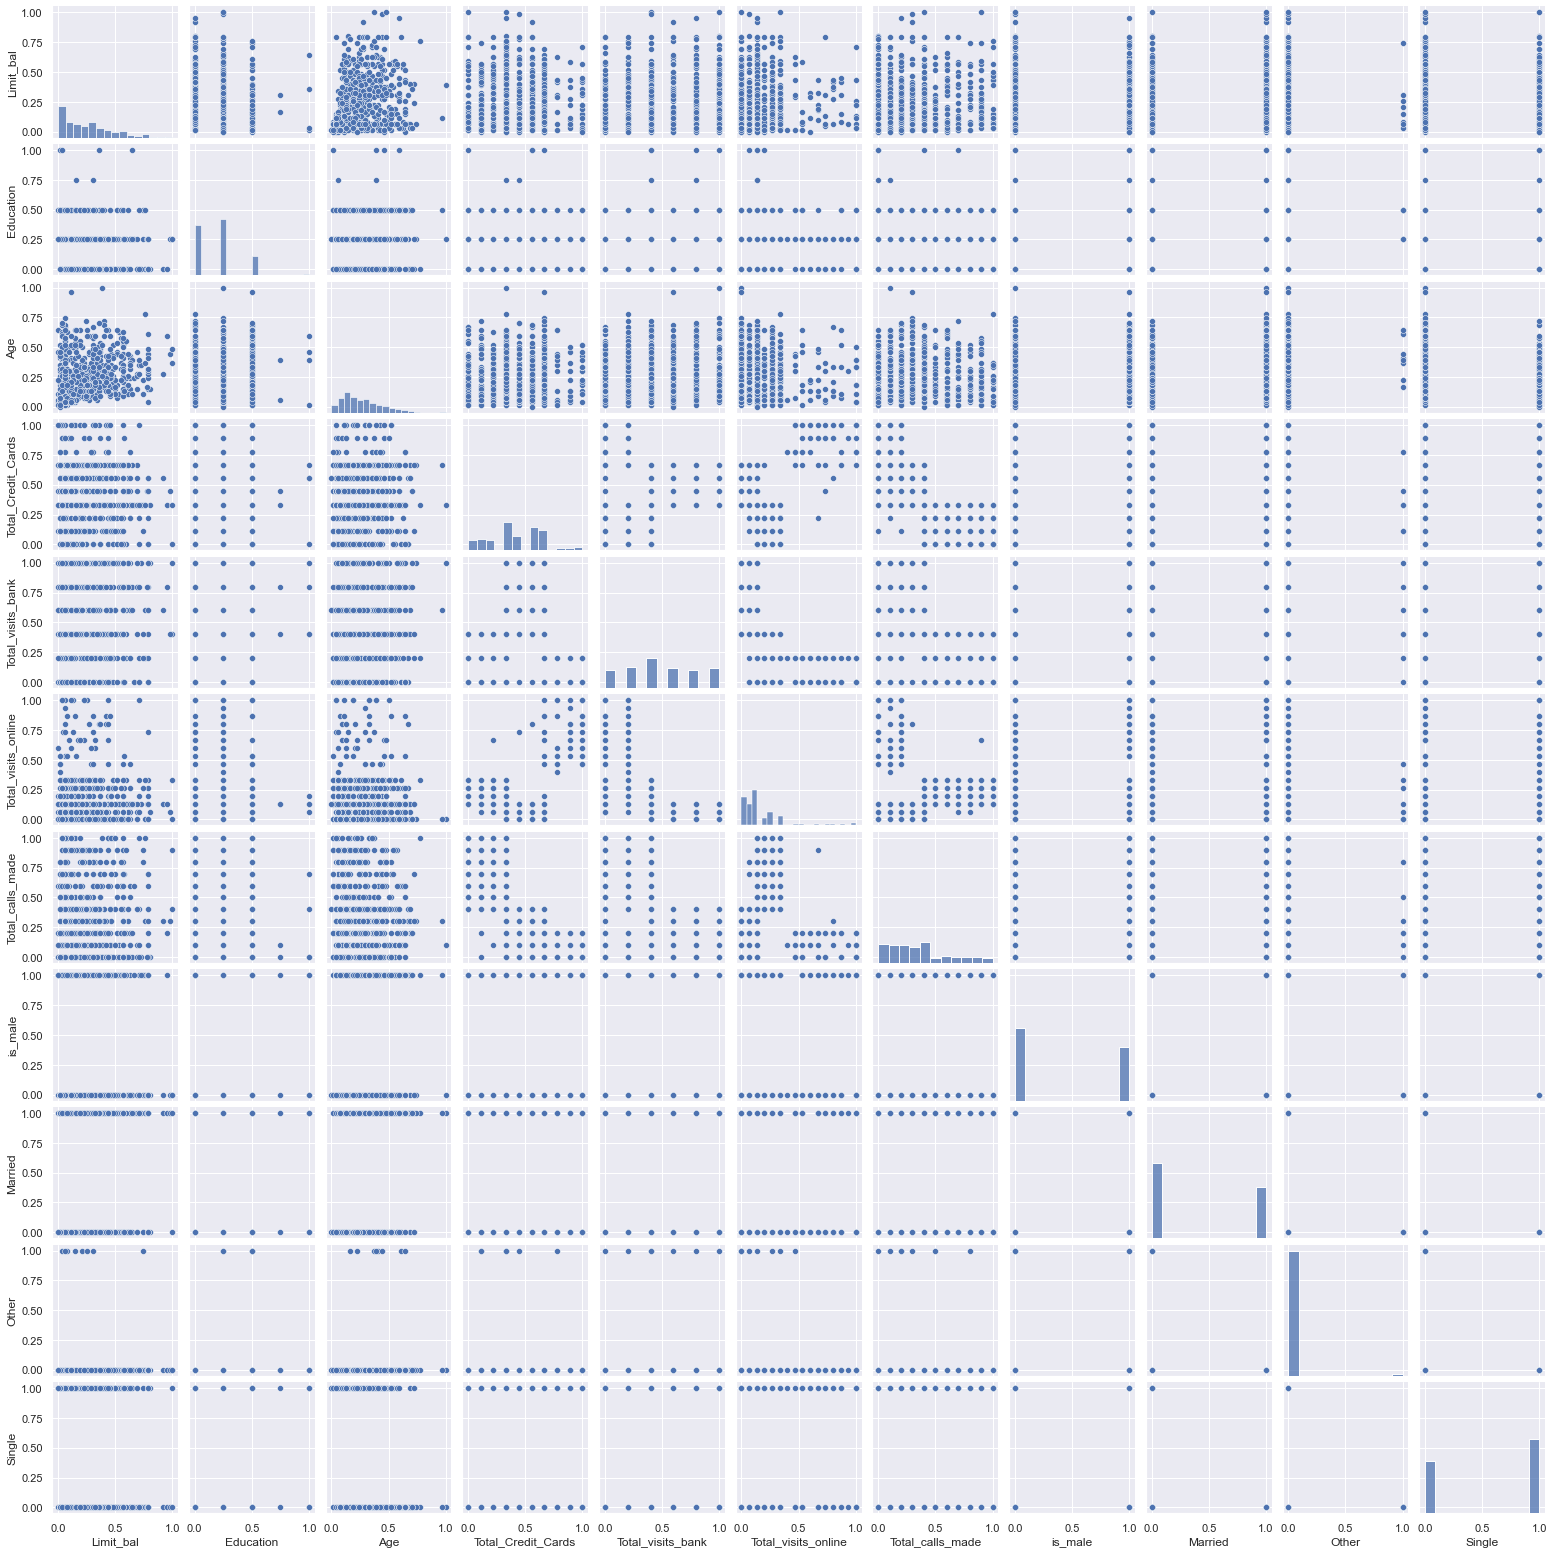

In [137]:
# Ver si hay grupos naturales en los datos
sns.pairplot(df_final.dropna(), height=2,kind='scatter')

### Encontrar el número óptimo de clústeres utilizando el método del codo

In [138]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(df_final)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

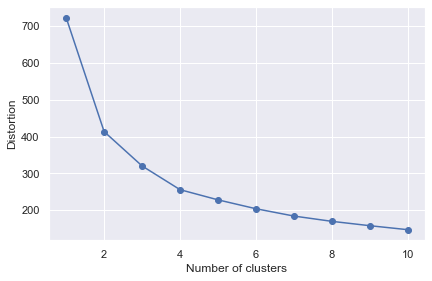

In [139]:
plot_distortion(X,1,11)

### Evaluación de la calidad de los clústeres obtenidos

In [140]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


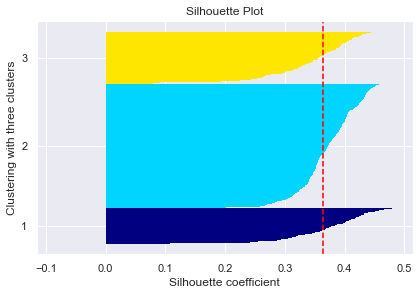

In [141]:
# Esta función puede tardar varios minutos
plot_silhouette(data = df_final, 
                labels = kmeans.labels_, 
                ylabel = 'Clustering with three clusters')

### Determinación de el "mejor" número de clúster 

In [142]:
# Identificar el valor de K, utilizando ahora el valor de la silueta

def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()   

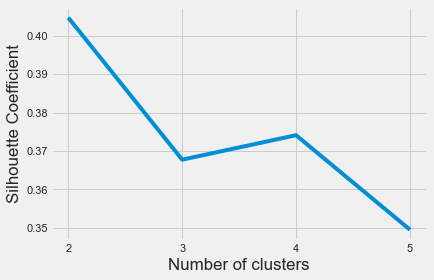

In [143]:

plot_selectK_silhoute(df_final,
                    k_min=2, 
                    k_max=6)

### Construcción el modelo

In [144]:
# Construimos un nuevo modelo, con las nuevas columnas y probaremos con k=2 y k=3
N_clusters=4
kmeans = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans = kmeans.fit(df_final)
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

### Visualización de resultados

In [105]:
#Transformar el contenido de las columnas a arreglo
cols_number = df_final.to_numpy()
df_final.columns

Index(['Limit_bal', 'Education', 'Age', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'is_male', 'Married', 'Other', 'Single', 'Cluster'],
      dtype='object')

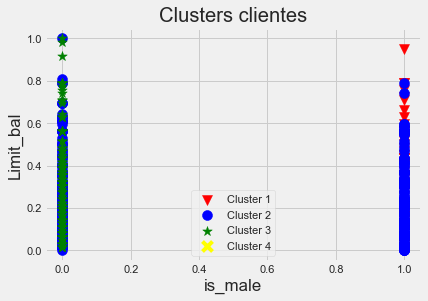

In [106]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[kmeans.labels_ == 0, 7], cols_number[kmeans.labels_ == 0, 0], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 7], cols_number[kmeans.labels_ == 1, 0], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans.labels_ == 2, 7], cols_number[kmeans.labels_ == 2, 0], s = 100, marker='*', c = 'green', label = 'Cluster 3')
plt.scatter(cols_number[kmeans.labels_ == 3, 7], cols_number[kmeans.labels_ == 3, 0], s = 100, marker='x', c = 'yellow', label = 'Cluster 4')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters clientes')
plt.xlabel(df_final.columns[7])
plt.ylabel(df_final.columns[0])
plt.legend()
plt.show()

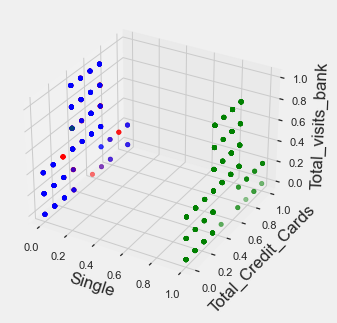

In [107]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[kmeans.labels_ == 0, 10], cols_number[kmeans.labels_ == 0, 3], cols_number[kmeans.labels_ == 0, 4],color='red')
ax.scatter(cols_number[kmeans.labels_ == 1, 10], cols_number[kmeans.labels_ == 1, 3], cols_number[kmeans.labels_ == 1, 4],color='green')
ax.scatter(cols_number[kmeans.labels_ == 2, 10], cols_number[kmeans.labels_ == 2, 3], cols_number[kmeans.labels_ == 2, 4],color='blue')
ax.scatter(cols_number[kmeans.labels_ == 3, 10], cols_number[kmeans.labels_ == 3, 3], cols_number[kmeans.labels_ == 3, 4],color='yellow')

#ax.scatter(mejor_HDBSc.cluster_centers_[:, 0],mejor_HDBSc.cluster_centers_[:, 1], mejor_HDBSc.cluster_centers_[:, 2], color='yellow',marker='o',s=200, label='centroids')
ax.set_xlabel(df_final.columns[10])
ax.set_ylabel(df_final.columns[3])
ax.set_zlabel(df_final.columns[4])
plt.show()

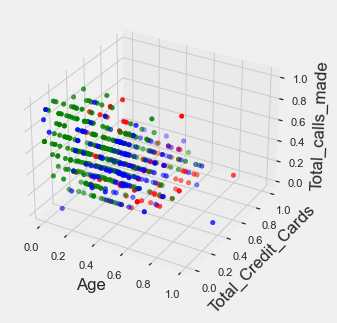

In [108]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[kmeans.labels_ == 0, 2], cols_number[kmeans.labels_ == 0, 3], cols_number[kmeans.labels_ == 0, 6],color='red')
ax.scatter(cols_number[kmeans.labels_ == 1, 2], cols_number[kmeans.labels_ == 1, 3], cols_number[kmeans.labels_ == 1, 6],color='green')
ax.scatter(cols_number[kmeans.labels_ == 2, 2], cols_number[kmeans.labels_ == 2, 3], cols_number[kmeans.labels_ == 2, 6],color='blue')
ax.scatter(cols_number[kmeans.labels_ == 3, 2], cols_number[kmeans.labels_ == 3, 3], cols_number[kmeans.labels_ == 3, 6],color='yellow')

#ax.scatter(mejor_HDBSc.cluster_centers_[:, 0],mejor_HDBSc.cluster_centers_[:, 1], mejor_HDBSc.cluster_centers_[:, 2], color='yellow',marker='o',s=200, label='centroids')
ax.set_xlabel(df_final.columns[2])
ax.set_ylabel(df_final.columns[3])
ax.set_zlabel(df_final.columns[6])
plt.show()

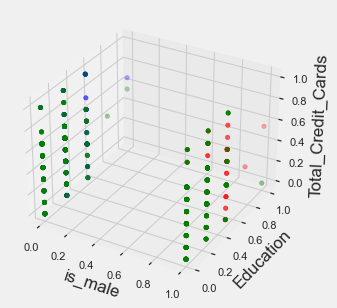

In [109]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[kmeans.labels_ == 0, 7], cols_number[kmeans.labels_ == 0, 1], cols_number[kmeans.labels_ == 0, 3],color='red')
ax.scatter(cols_number[kmeans.labels_ == 1, 7], cols_number[kmeans.labels_ == 1, 1], cols_number[kmeans.labels_ == 1, 3],color='green')
ax.scatter(cols_number[kmeans.labels_ == 2, 7], cols_number[kmeans.labels_ == 2, 1], cols_number[kmeans.labels_ == 2, 3],color='blue')
ax.scatter(cols_number[kmeans.labels_ == 3, 7], cols_number[kmeans.labels_ == 3, 1], cols_number[kmeans.labels_ == 3, 3],color='yellow')

#ax.scatter(mejor_HDBSc.cluster_centers_[:, 0],mejor_HDBSc.cluster_centers_[:, 1], mejor_HDBSc.cluster_centers_[:, 2], color='yellow',marker='o',s=200, label='centroids')
ax.set_xlabel(df_final.columns[7])
ax.set_ylabel(df_final.columns[1])
ax.set_zlabel(df_final.columns[3])
plt.show()

## Implementación HDBScan Clustering

In [27]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(df_final)

HDBSCAN()

Se puede ver gráficamente en dos dimensiones gracias a TNSE

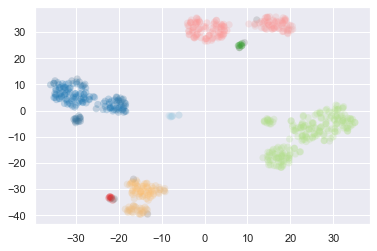

In [28]:
projection = TSNE().fit_transform(df_final)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

### Selección de parámetros

Se puede observar que existen clusters muy pequeños, pdoría mejorar el modelo si se incluyen esos valores en los clusters que tienen más cercanos

#### Selección min_cluster_size

Se probará cuál es el valor que genera mejor coeficiente de silueta

In [29]:
# Identificar el valor de min_cluster_size, utilizando ahora el valor de la silueta
def plot_select_size_silhoute(data,
                    size_min=5, 
                    size_max=105,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Min Clusters Size',
                    style = 'fivethirtyeight'):
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []
    xticks = []
    
    k = size_min
    while k <= size_max:
        HDBSc = hdbscan.HDBSCAN(min_cluster_size=k)
        HDBSc.fit(data)
        score = silhouette_score(data, HDBSc.labels_)
        silhouette_coefficients.append(score)
        xticks.append(k)
        k += 10
    plt.style.use(style)
    plt.plot(xticks, silhouette_coefficients)
    plt.xticks(xticks)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

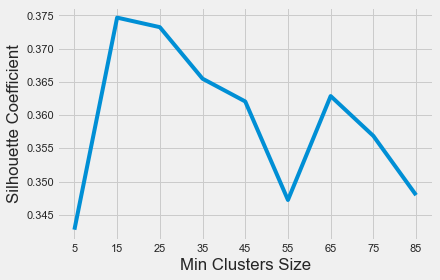

In [30]:
plot_select_size_silhoute(df_final, size_min=5, size_max=90)

El mejor valor reportado es de 15

#### Selección min_samples

Se probará cuál es el valor que genera mejor coeficiente de silueta

In [31]:
# Identificar el valor de min_cluster_size, utilizando ahora el valor de la silueta
def plot_select_samples_silhoute(data,
                    samples_min=1, 
                    samples_max=105,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Min Samples',
                    style = 'fivethirtyeight'):
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []
    xticks = []
    
    k = samples_min
    while k <= samples_max:
        HDBSc = hdbscan.HDBSCAN(min_samples=k)
        HDBSc.fit(data)
        score = silhouette_score(data, HDBSc.labels_)
        silhouette_coefficients.append(score)
        xticks.append(k)
        k += 5
    plt.style.use(style)
    plt.plot(xticks, silhouette_coefficients)
    plt.xticks(xticks)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

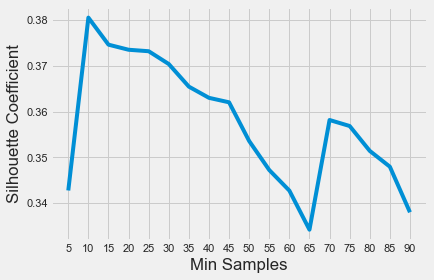

In [32]:
plot_select_samples_silhoute(df_final, samples_min=5, samples_max=90)

El mejor valor reportado es de 10

### Mejor modelo

Se utilizan los parámetros encontrados anteriormente

In [50]:
mejor_HDBSc = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=10)
mejor_HDBSc.fit(df_final)
np.unique(mejor_HDBSc.labels_)

array([-1,  0,  1,  2,  3])

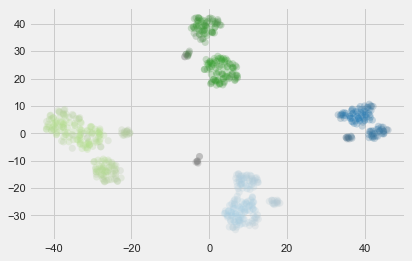

In [51]:
projection = TSNE().fit_transform(df_final)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in mejor_HDBSc.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, mejor_HDBSc.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [35]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    cluster_labels = np.delete(cluster_labels,[0])
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2 3]


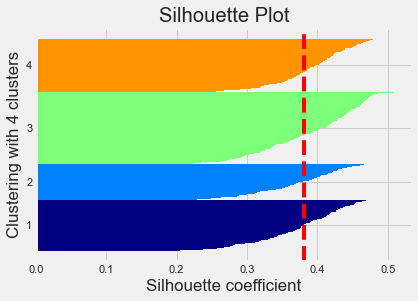

In [52]:
plot_silhouette(data = df_final, 
                labels = mejor_HDBSc.labels_, 
                ylabel = 'Clustering with 4 clusters')

In [63]:
#Transformar el contenido de las columnas a arreglo
cols_number = df_final.to_numpy()
df_final.columns

Index(['Limit_bal', 'Education', 'Age', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'is_male', 'Married', 'Other', 'Single'],
      dtype='object')

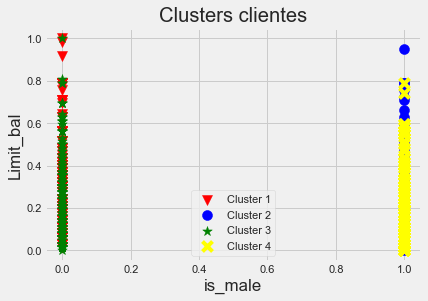

In [78]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[mejor_HDBSc.labels_ == 0, 7], cols_number[mejor_HDBSc.labels_ == 0, 0], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[mejor_HDBSc.labels_ == 1, 7], cols_number[mejor_HDBSc.labels_ == 1, 0], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[mejor_HDBSc.labels_ == 2, 7], cols_number[mejor_HDBSc.labels_ == 2, 0], s = 100, marker='*', c = 'green', label = 'Cluster 3')
plt.scatter(cols_number[mejor_HDBSc.labels_ == 3, 7], cols_number[mejor_HDBSc.labels_ == 3, 0], s = 100, marker='x', c = 'yellow', label = 'Cluster 4')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters clientes')
plt.xlabel(df_final.columns[7])
plt.ylabel(df_final.columns[0])
plt.legend()
plt.show()

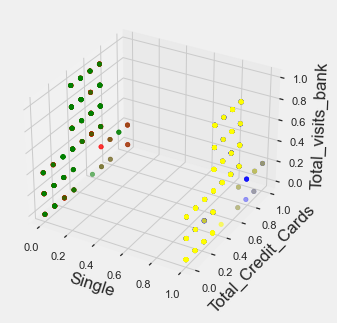

In [80]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[mejor_HDBSc.labels_ == 0, 10], cols_number[mejor_HDBSc.labels_ == 0, 3], cols_number[mejor_HDBSc.labels_ == 0, 4],color='red')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 1, 10], cols_number[mejor_HDBSc.labels_ == 1, 3], cols_number[mejor_HDBSc.labels_ == 1, 4],color='green')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 2, 10], cols_number[mejor_HDBSc.labels_ == 2, 3], cols_number[mejor_HDBSc.labels_ == 2, 4],color='blue')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 3, 10], cols_number[mejor_HDBSc.labels_ == 3, 3], cols_number[mejor_HDBSc.labels_ == 3, 4],color='yellow')

#ax.scatter(mejor_HDBSc.cluster_centers_[:, 0],mejor_HDBSc.cluster_centers_[:, 1], mejor_HDBSc.cluster_centers_[:, 2], color='yellow',marker='o',s=200, label='centroids')
ax.set_xlabel(df_final.columns[10])
ax.set_ylabel(df_final.columns[3])
ax.set_zlabel(df_final.columns[4])
plt.show()

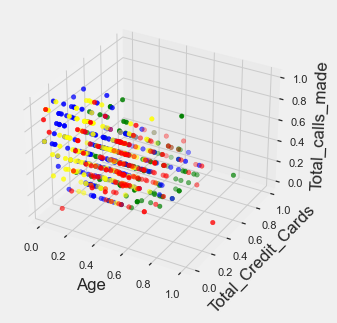

In [70]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[mejor_HDBSc.labels_ == 0, 2], cols_number[mejor_HDBSc.labels_ == 0, 3], cols_number[mejor_HDBSc.labels_ == 0, 6],color='red')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 1, 2], cols_number[mejor_HDBSc.labels_ == 1, 3], cols_number[mejor_HDBSc.labels_ == 1, 6],color='green')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 2, 2], cols_number[mejor_HDBSc.labels_ == 2, 3], cols_number[mejor_HDBSc.labels_ == 2, 6],color='blue')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 3, 2], cols_number[mejor_HDBSc.labels_ == 3, 3], cols_number[mejor_HDBSc.labels_ == 3, 6],color='yellow')

#ax.scatter(mejor_HDBSc.cluster_centers_[:, 0],mejor_HDBSc.cluster_centers_[:, 1], mejor_HDBSc.cluster_centers_[:, 2], color='yellow',marker='o',s=200, label='centroids')
ax.set_xlabel(df_final.columns[2])
ax.set_ylabel(df_final.columns[3])
ax.set_zlabel(df_final.columns[6])
plt.show()

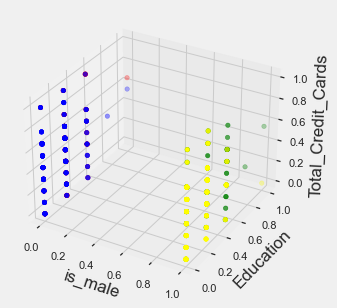

In [81]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[mejor_HDBSc.labels_ == 0, 7], cols_number[mejor_HDBSc.labels_ == 0, 1], cols_number[mejor_HDBSc.labels_ == 0, 3],color='red')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 1, 7], cols_number[mejor_HDBSc.labels_ == 1, 1], cols_number[mejor_HDBSc.labels_ == 1, 3],color='green')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 2, 7], cols_number[mejor_HDBSc.labels_ == 2, 1], cols_number[mejor_HDBSc.labels_ == 2, 3],color='blue')
ax.scatter(cols_number[mejor_HDBSc.labels_ == 3, 7], cols_number[mejor_HDBSc.labels_ == 3, 1], cols_number[mejor_HDBSc.labels_ == 3, 3],color='yellow')

#ax.scatter(mejor_HDBSc.cluster_centers_[:, 0],mejor_HDBSc.cluster_centers_[:, 1], mejor_HDBSc.cluster_centers_[:, 2], color='yellow',marker='o',s=200, label='centroids')
ax.set_xlabel(df_final.columns[7])
ax.set_ylabel(df_final.columns[1])
ax.set_zlabel(df_final.columns[3])
plt.show()